# Introduction to fast.ai

_Summary:_ In this notebook we train a [convolutional neural network](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) to classify images downloaded from Google. We show how the [fast.ai](https://www.fast.ai/) library can be used to apply [transfer learning](https://machinelearningmastery.com/transfer-learning-for-deep-learning/) to obtain impressive performance, with only a relatively small number of images.

_Sources:_ 

* lesson 1 from the fast.ai [MOOC](https://course.fast.ai/videos/?lesson=1)
* based on the lecture given by my colleague (Leandro von Werra) at the Bern University of Applied Sciences

_Created by:_ Lewis Tunstall, Summer 2019

## Load libraries

In [1]:
# reload modules before executing user code
%load_ext autoreload
# reload all modules every time before executing the Python code
%autoreload 2
# view plots in notebook
%matplotlib inline

In [2]:
import os
import shutil
import pandas as pd
from fastai.vision import *
from fastai.widgets import DatasetFormatter, ImageCleaner
from image_downloader import ImageDownloader

In [1]:
# this step is only necessary if you want to download more than 100 images. Otherwise you can skip these steps.
!pip install selenium

    100% |████████████████████████████████| 911kB 16.1MB/s ta 0:00:01


In [2]:
!apt-get update
!apt-get install chromium-chromedriver --yes

Ign:1 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Get:2 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release [564 B]
Get:3 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release.gpg [801 B]
Get:4 http://security.ubuntu.com/ubuntu xenial-security InRelease [109 kB]     
Get:5 http://archive.ubuntu.com/ubuntu xenial InRelease [247 kB]               
Get:6 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Packages [47.8 kB]
Ign:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Release.gpg [801 B]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Packages [209 kB]
Get:11 htt

Need to get 96.2 MB of archives.
After this operation, 365 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 libsystemd0 amd64 229-4ubuntu21.21 [204 kB]
Get:2 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 systemd amd64 229-4ubuntu21.21 [3629 kB]
Get:3 http://archive.ubuntu.com/ubuntu xenial/main amd64 libatm1 amd64 1:2.5.1-1.5 [24.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu xenial/main amd64 libmnl0 amd64 1.0.3-5 [12.0 kB]
Get:5 http://archive.ubuntu.com/ubuntu xenial/main amd64 libasound2-data all 1.1.0-0ubuntu1 [29.4 kB]
Get:6 http://archive.ubuntu.com/ubuntu xenial/main amd64 libasound2 amd64 1.1.0-0ubuntu1 [350 kB]
Get:7 http://archive.ubuntu.com/ubuntu xenial/main amd64 libatk1.0-data all 2.18.0-1 [17.1 kB]
Get:8 http://archive.ubuntu.com/ubuntu xenial/main amd64 libatk1.0-0 amd64 2.18.0-1 [56.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 libdbus-1-3 amd64 1.10.6-1ubuntu3.4 [161 kB]
Get

Get:79 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 libnss3-nssdb all 2:3.28.4-0ubuntu0.16.04.5 [10.6 kB]
Get:80 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 libnss3 amd64 2:3.28.4-0ubuntu0.16.04.5 [1148 kB]
Get:81 http://archive.ubuntu.com/ubuntu xenial/main amd64 libxss1 amd64 1:1.2.2-1 [8582 B]
Get:82 http://archive.ubuntu.com/ubuntu xenial/main amd64 libxtst6 amd64 2:1.2.2-1 [14.1 kB]
Get:83 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 xdg-utils all 1.1.1-1ubuntu1.16.04.3 [59.6 kB]
Get:84 http://archive.ubuntu.com/ubuntu xenial-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 74.0.3729.169-0ubuntu0.16.04.1 [1106 kB]
Get:85 http://archive.ubuntu.com/ubuntu xenial-updates/universe amd64 chromium-browser amd64 74.0.3729.169-0ubuntu0.16.04.1 [59.3 MB]
Get:86 http://archive.ubuntu.com/ubuntu xenial-updates/universe amd64 chromium-browser-l10n all 74.0.3729.169-0ubuntu0.16.04.1 [2900 kB]
Get:87 http://archive.ubuntu.com/ubuntu xenial-upd

Unpacking librsvg2-2:amd64 (2.40.13-3) ...
Selecting previously unselected package librsvg2-common:amd64.
Preparing to unpack .../librsvg2-common_2.40.13-3_amd64.deb ...
Unpacking librsvg2-common:amd64 (2.40.13-3) ...
Selecting previously unselected package humanity-icon-theme.
Preparing to unpack .../humanity-icon-theme_0.6.10.1_all.deb ...
Unpacking humanity-icon-theme (0.6.10.1) ...
Selecting previously unselected package ubuntu-mono.
Preparing to unpack .../ubuntu-mono_14.04+16.04.20180326-0ubuntu1_all.deb ...
Unpacking ubuntu-mono (14.04+16.04.20180326-0ubuntu1) ...
Selecting previously unselected package adwaita-icon-theme.
Preparing to unpack .../adwaita-icon-theme_3.18.0-2ubuntu3.1_all.deb ...
Unpacking adwaita-icon-theme (3.18.0-2ubuntu3.1) ...
Selecting previously unselected package libgtk-3-common.
Preparing to unpack .../libgtk-3-common_3.18.9-1ubuntu3.3_all.deb ...
Unpacking libgtk-3-common (3.18.9-1ubuntu3.3) ...
Selecting previously unselected package libcairo-gobject2:a

Selecting previously unselected package libxss1:amd64.
Preparing to unpack .../libxss1_1%3a1.2.2-1_amd64.deb ...
Unpacking libxss1:amd64 (1:1.2.2-1) ...
Selecting previously unselected package libxtst6:amd64.
Preparing to unpack .../libxtst6_2%3a1.2.2-1_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.2-1) ...
Selecting previously unselected package xdg-utils.
Preparing to unpack .../xdg-utils_1.1.1-1ubuntu1.16.04.3_all.deb ...
Unpacking xdg-utils (1.1.1-1ubuntu1.16.04.3) ...
Selecting previously unselected package chromium-codecs-ffmpeg-extra.
Preparing to unpack .../chromium-codecs-ffmpeg-extra_74.0.3729.169-0ubuntu0.16.04.1_amd64.deb ...
Unpacking chromium-codecs-ffmpeg-extra (74.0.3729.169-0ubuntu0.16.04.1) ...
Selecting previously unselected package chromium-browser.
Preparing to unpack .../chromium-browser_74.0.3729.169-0ubuntu0.16.04.1_amd64.deb ...
Unpacking chromium-browser (74.0.3729.169-0ubuntu0.16.04.1) ...
Selecting previously unselected package chromium-browser-l10n.
Prepari

Selecting previously unselected package libfile-basedir-perl.
Preparing to unpack .../libfile-basedir-perl_0.07-1_all.deb ...
Unpacking libfile-basedir-perl (0.07-1) ...
Selecting previously unselected package liburi-perl.
Preparing to unpack .../liburi-perl_1.71-1_all.deb ...
Unpacking liburi-perl (1.71-1) ...
Selecting previously unselected package libfile-desktopentry-perl.
Preparing to unpack .../libfile-desktopentry-perl_0.22-1_all.deb ...
Unpacking libfile-desktopentry-perl (0.22-1) ...
Selecting previously unselected package libtimedate-perl.
Preparing to unpack .../libtimedate-perl_2.3000-2_all.deb ...
Unpacking libtimedate-perl (2.3000-2) ...
Selecting previously unselected package libhttp-date-perl.
Preparing to unpack .../libhttp-date-perl_6.02-1_all.deb ...
Unpacking libhttp-date-perl (6.02-1) ...
Selecting previously unselected package libfile-listing-perl.
Preparing to unpack .../libfile-listing-perl_6.04-1_all.deb ...
Unpacking libfile-listing-perl (6.04-1) ...
Selecting

Setting up libcroco3:amd64 (0.6.11-1) ...
Setting up libthai-data (0.1.24-2) ...
Setting up libdatrie1:amd64 (0.2.10-2) ...
Setting up libthai0:amd64 (0.1.24-2) ...
Setting up libpango-1.0-0:amd64 (1.38.1-1) ...
Setting up libgraphite2-3:amd64 (1.3.10-0ubuntu0.16.04.1) ...
Setting up libharfbuzz0b:amd64 (1.0.1-1ubuntu0.1) ...
Setting up libpangoft2-1.0-0:amd64 (1.38.1-1) ...
Setting up libpangocairo-1.0-0:amd64 (1.38.1-1) ...
Setting up librsvg2-2:amd64 (2.40.13-3) ...
Setting up librsvg2-common:amd64 (2.40.13-3) ...
Setting up libcairo-gobject2:amd64 (1.14.6-1) ...
Setting up libcolord2:amd64 (1.2.12-1ubuntu1) ...
Setting up libepoxy0:amd64 (1.3.1-1ubuntu0.16.04.2) ...
Setting up libjson-glib-1.0-common (1.1.2-0ubuntu1) ...
Setting up libjson-glib-1.0-0:amd64 (1.1.2-0ubuntu1) ...
Setting up libboost-system1.58.0:amd64 (1.58.0+dfsg-5ubuntu3.1) ...
Setting up libcapnp-0.5.3:amd64 (0.5.3-2ubuntu1.1) ...
Setting up libboost-filesystem1.58.0:amd64 (1.58.0+dfsg-5ubuntu3.1) ...
Setting up li

## Create a dataset
Before we train any models, we first need some images! Fortunately fast.ai has a nifty widget called `ImageDownloader` which allows us to download images from Google search directly into a target directory.

For this experiment, I decided to take approximately 300 images of Australian marsupials and build a classifier to differentiate them.

**Australian Marsupials**
* Kangaroo
* Koala
* Wombat
* Wallaby
* Quokka
* Tasmanian Devil
* Bilby
* Quoll

The first step is to spin up the image downloader and specify the search terms:

In [3]:
# by default Config.data_path() = storage/
path = Config.data_path()/'fri-ml'/'image_downloader'
os.makedirs(path, exist_ok=True)
ImageDownloader(path)

Behind the scenes, `ImageDownloader` creates a directory for each search query:

In [4]:
path.ls()

[PosixPath('/storage/fri-ml/image_downloader/cleaned.csv'),
 PosixPath('/storage/fri-ml/image_downloader/wallaby'),
 PosixPath('/storage/fri-ml/image_downloader/quokka'),
 PosixPath('/storage/fri-ml/image_downloader/koala'),
 PosixPath('/storage/fri-ml/image_downloader/wombat'),
 PosixPath('/storage/fri-ml/image_downloader/bilby'),
 PosixPath('/storage/fri-ml/image_downloader/tasmanian devil'),
 PosixPath('/storage/fri-ml/image_downloader/kangaroo'),
 PosixPath('/storage/fri-ml/image_downloader/quoll'),
 PosixPath('/storage/fri-ml/image_downloader/models')]

**Note:** If you want to remove a folder directly in the notebook you can do this as follows:

In [ ]:
!rm -rf /storage/image_downloader/"YOUR_FOLDER"

Next, let's have a peek at how many iamges we have in each directory (sometimes the `ImageDownloader` fails to parse an image from the search and throws it out):

In [11]:
dirs = path.ls()
for dir in dirs:
    count = !ls '{path/dir}' | wc -l
    print("%s:\t%s" % (dir, count[0]))

/storage/fri-ml/image_downloader/cleaned.csv:	1
/storage/fri-ml/image_downloader/wallaby:	277
/storage/fri-ml/image_downloader/quokka:	271
/storage/fri-ml/image_downloader/koala:	282
/storage/fri-ml/image_downloader/wombat:	269
/storage/fri-ml/image_downloader/bilby:	257
/storage/fri-ml/image_downloader/tasmanian devil:	272
/storage/fri-ml/image_downloader/kangaroo:	283
/storage/fri-ml/image_downloader/quoll:	257
/storage/fri-ml/image_downloader/models:	1


OK, so we have around 250-280 images per marsupial class and rather balanced. Next we create an `ImageDataBunch`  which we can later use to train our model. 

In the steps below, note the following:
1. A trick often used in image classification is **_data augmentation_**. This means one creates more data by manipulating existing data. For images this means that the images can be rotated, flipped cropped etc. This generally improves the performance of the classifier and is setup with the `get_transforms` function.
2. We **_split the data_** 80/20 into train and validation data.
3. We **_crop the images_** to a size of 224 pixels.

In [5]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid_pct=0.2, size=224)

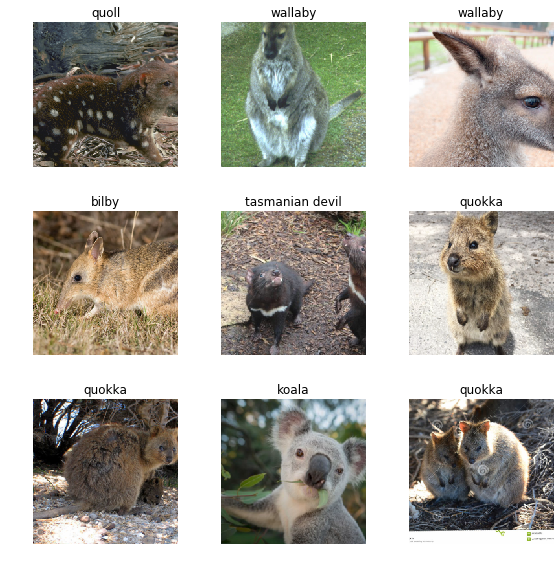

In [6]:
data.show_batch(rows=3, figsize=(8, 8))

As a sanity check, let's check that the class names are as expected:

In [14]:
print(data.classes)

['bilby', 'kangaroo', 'koala', 'quokka', 'quoll', 'tasmanian devil', 'wallaby', 'wombat']


## Train a model
Now for the fun stuff - training a model! As explained in lesson 1 from the fast.ai MOOC, training a CNN typically involves the following steps:

1. Load a pretrained model (e.g. resnet34, resnet50, etc)
2. Find the optimal learning rate
3. Fit the head of the network
4. Unfreeze all layers and fine-tune
5. Evaluate the results

Let's got through each step in turn.

### Load a pretrained model
Following Jeremy Howard's advice, we stick with resnet34 as this should give us good performance with minimal tuning.

In [26]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

### Find the optimal learning rate
In this step, the goal is to find the best learning rate that a) avoids overshooting during stochastic gradient descent, and b) converges as a fast as possible. As explained in the lesson, the rule of thumb is to locate the minimum and pick a learning rate that is about a factor of 10 smaller.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


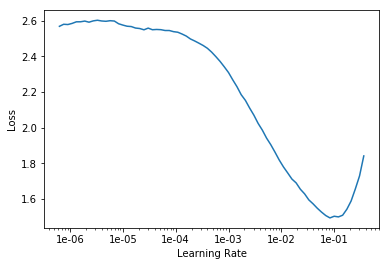

In [14]:
learn.lr_find()
learn.recorder.plot()

From the plot we see the minimum is located around $10^{-1}$ so let's pick a learning rate of $10^{-2}$.

### Fit the head of the network
Resnet34 was trained on ImageNet which has 1,000 classes instead of our measly 8. Thus we first need to train the head of the network to adapt it to our use case:

In [27]:
learn.fit_one_cycle(cyc_len=3, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.857431,0.894984,0.769053
2,0.612535,0.409940,0.877598
3,0.453959,0.313553,0.923788


In [28]:
learn.save('tmp_fit-head')

In [39]:
learn.load('tmp_fit-head');

92.4% accuracy on the validation set - not too shabby! This likely reflects the fact that ImageNet contains many pictures of animals, apparently even Australian marsupials.

### Unfreeze all layers
Now that we've tuned the head of the network to our dataset, the next step is to unfreeze all the layers, apply discriminative training, and see if we can generate a more accurate model. The procedure is the same as in the previous step: 
1. Find the best learning rate.
2. Train the network with this learning rate.

In [37]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


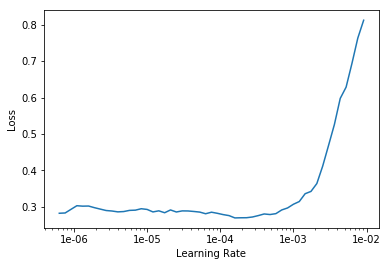

In [31]:
learn.lr_find()
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(2, 1e-6)

epoch,train_loss,valid_loss,accuracy
1,0.269056,0.309142,0.923788
2,0.273672,0.308814,0.928406


In [47]:
learn.save('tmp_fit-all')

In [66]:
learn.load('tmp_fit-all');

With the unfreezing and repeated fine-tuning we gained a slight boost and achieved 92.8% classification accuracy!

### Evaluate the results
Let's see which classes our classifier is having the most identifying correctly:

In [41]:
interp = ClassificationInterpretation.from_learner(learn)

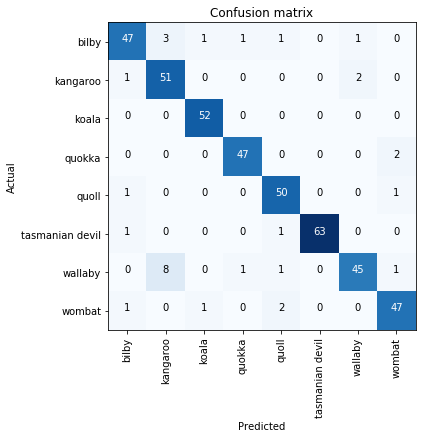

In [43]:
interp.plot_confusion_matrix(figsize=(6,6))

Unsuprisingly, distinguishing kangaroos from wallabies is giving it the most trouble. Otherwise, the confusion matrix looks pretty good. Next, let's look at the worst predictions:

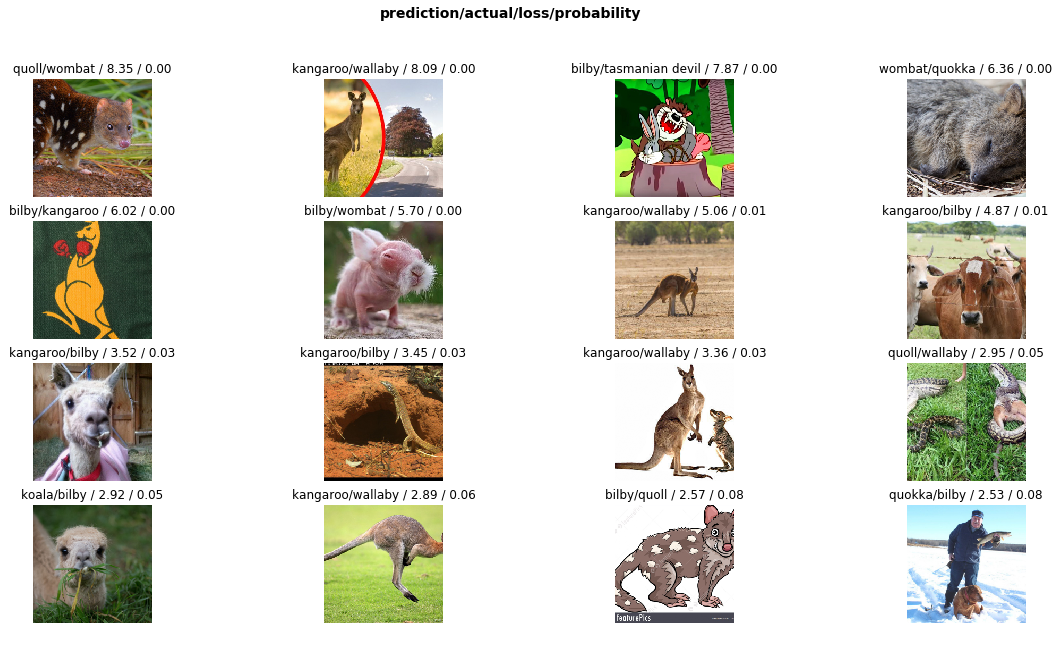

In [44]:
interp.plot_top_losses(16, figsize=(20,10))

OK we clearly have some quirks in the dataset - let's see if we can clean it up and get a better accuracy.

## Data cleaning
fast.ai also comes with a nifty `ImageCleaner` that we can use to either remove images or correct the labels:

In [67]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [68]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

The results are stored in a csv file named `cleaned.csv`.

In [69]:
path.ls()

[PosixPath('/storage/fri-ml/image_downloader/cleaned.csv'),
 PosixPath('/storage/fri-ml/image_downloader/wallaby'),
 PosixPath('/storage/fri-ml/image_downloader/quokka'),
 PosixPath('/storage/fri-ml/image_downloader/koala'),
 PosixPath('/storage/fri-ml/image_downloader/wombat'),
 PosixPath('/storage/fri-ml/image_downloader/bilby'),
 PosixPath('/storage/fri-ml/image_downloader/tasmanian devil'),
 PosixPath('/storage/fri-ml/image_downloader/kangaroo'),
 PosixPath('/storage/fri-ml/image_downloader/quoll'),
 PosixPath('/storage/fri-ml/image_downloader/models'),
 PosixPath('/storage/fri-ml/image_downloader/.ipynb_checkpoints')]

We can load the cleaned dataset and repeat the training steps above with a new classifier:

In [70]:
data = ImageDataBunch.from_csv(path, csv_labels='cleaned.csv', ds_tfms=tfms, valid_pct=0.2, size=224)

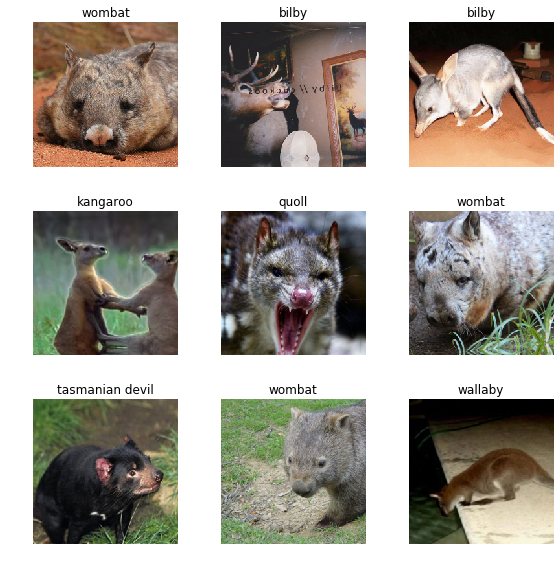

In [71]:
data.show_batch(rows=3, figsize=(8, 8))

### Load a pretrained model

In [72]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

### Fit the head

In [73]:
learn.fit_one_cycle(3, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.990181,0.398701,0.857678
2,0.615025,0.369807,0.883895
3,0.451079,0.263094,0.902622


In [74]:
learn.save('tmp_fit-head-clean')

In [79]:
learn.load('tmp_fit-head-clean');

### Unfreeze all layers

In [80]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


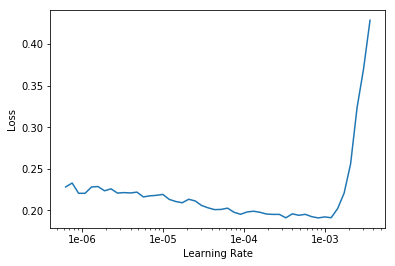

In [81]:
learn.lr_find()
learn.recorder.plot()

In [82]:
learn.fit_one_cycle(3, 1e-4)

epoch,train_loss,valid_loss,accuracy
1,0.212600,0.248231,0.917603
2,0.165235,0.214420,0.928839
3,0.142316,0.213099,0.932584


In [84]:
learn.save('tmp_fit-all-clean')

In [85]:
learn.load('tmp_fit-all-clean');

Evidently, the cleaning has helped give us yet another small boost and achieve **93.3% accuracy**! Also the confusion matrix looks quite acceptable now:

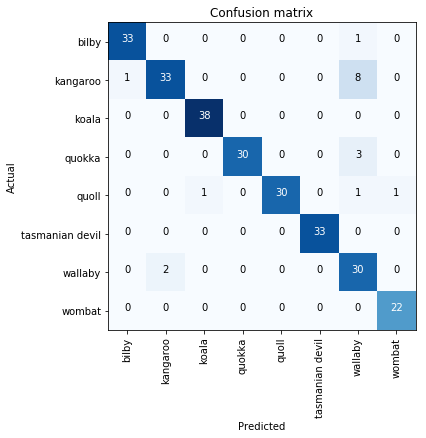

In [83]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6))

We can also look at the classes that were most frequently confused:

In [86]:
interp.most_confused()

[('kangaroo', 'wallaby', 8),
 ('quokka', 'wallaby', 3),
 ('wallaby', 'kangaroo', 2)]

Looking at the top losses we see again that there are some pictures in the wrong class or totally unrelated. In another cleaning phase we could further improve the performence by cleaning the dataset.

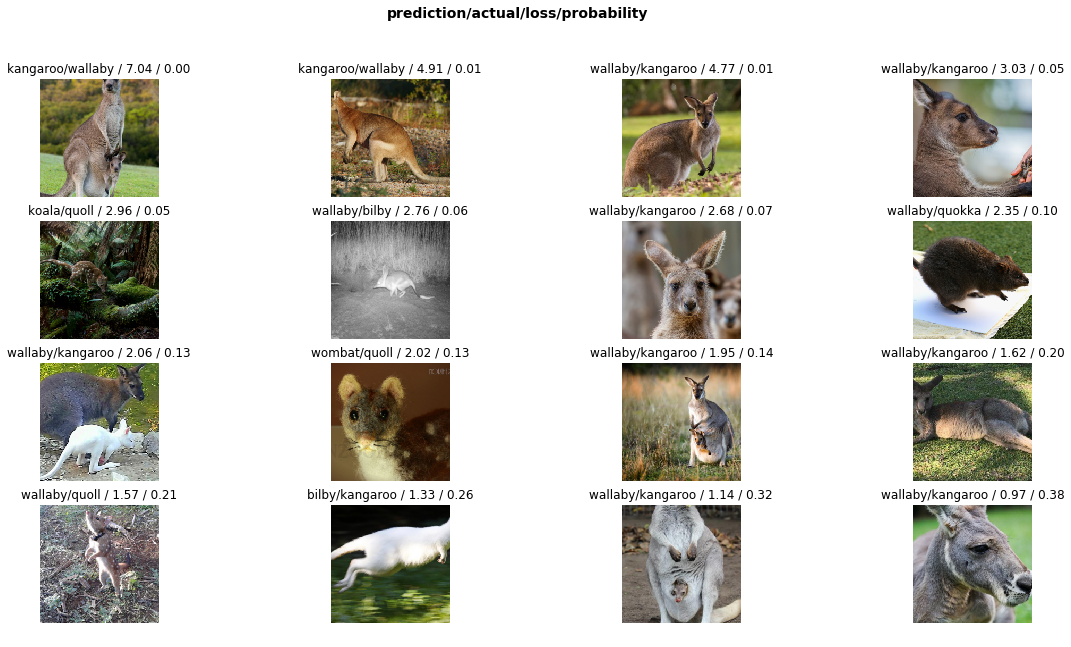

In [87]:
interp.plot_top_losses(16, figsize=(20,10))

In addition to the top losses on can also look at the minimum losses or in other words the images that were best classified:

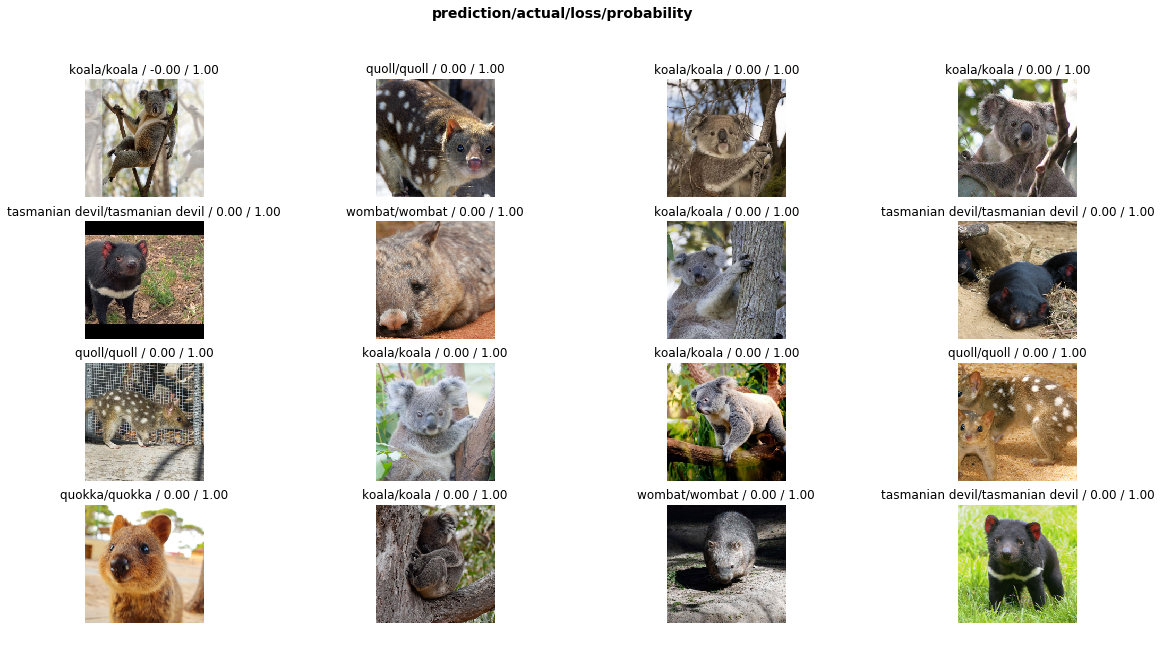

In [88]:
interp.plot_top_losses(16, figsize=(20,10), largest=False)

It seems like our classifier is quite good at distinguishing tassie devils and koalas :)